# Cobertura dos artigos

Checa se os dados do SCImagoJR cobrem todos os periódicos e as confereências dos dados dos perfis da plataforma Lattes.

In [1]:
import difflib
import unidecode
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

Dados do SCImagoJR

In [2]:
sjr = pd.read_csv("../dataset/SJR/scimagojr completo.csv", sep=";", header=0)
sjr.head(10)

,Sourceid,Title,Type,Country,Categories
0,28773,CA - A Cancer Journal for Clinicians,journal,United States,Hematology (Q1); Oncology (Q1)
1,19434,MMWR. Recommendations and reports : Morbidity ...,journal,United States,Epidemiology (Q1); Health Information Manageme...
2,21100812243,Nature Reviews Materials,journal,United Kingdom,"Biomaterials (Q1); Electronic, Optical and Mag..."
3,29431,Quarterly Journal of Economics,journal,United Kingdom,Economics and Econometrics (Q1)
4,18991,Nature Reviews Genetics,journal,United Kingdom,Genetics (Q1); Genetics (clinical) (Q1); Molec...
5,20315,Nature Reviews Molecular Cell Biology,journal,United Kingdom,Cell Biology (Q1); Molecular Biology (Q1)
6,12464,Nature Reviews Cancer,journal,United Kingdom,Cancer Research (Q1); Oncology (Q1)
7,58530,National vital statistics reports : from the C...,journal,United States,Life-span and Life-course Studies (Q1)
8,21318,Nature Reviews Immunology,journal,United Kingdom,Immunology (Q1); Immunology and Allergy (Q1); ...
9,18434,Cell,journal,United States,"Biochemistry, Genetics and Molecular Biology (..."


Dados da plataforma Lattes

In [3]:
artigos = pd.read_csv("../dataset/lattes/artigos.csv", sep=";sep;", header=0, usecols=["journal_ou_conferencia"], engine='python')
artigos = artigos.groupby("journal_ou_conferencia").size().sort_values(ascending=False)
artigos.head(15)

journal_ou_conferencia
Plos One                                                                 20889
Revista Brasileira de Zootecnia / Brazilian Journal of Animal Science    15068
Arquivo Brasileiro de Medicina Veterinária e Zootecnia                   14067
Arquivos Brasileiros de Cardiologia                                      12700
Ciência Rural (UFSM. Impresso)                                           11376
Brazilian Journal of Medical and Biological Research                      9768
Journal of Dental Research                                                9476
Pesquisa Agropecuária Brasileira                                          9308
Ciência Rural                                                             9263
Pesquisa Odontológica Brasileira                                          9154
Química Nova (Impresso)                                                   8750
Arquivos Brasileiros de Cardiologia (Impresso)                            8660
Higiene Alimentar            

CCDF do número de publicações em cada periódico, por pessoa nos dados do Lattes, escala log-log

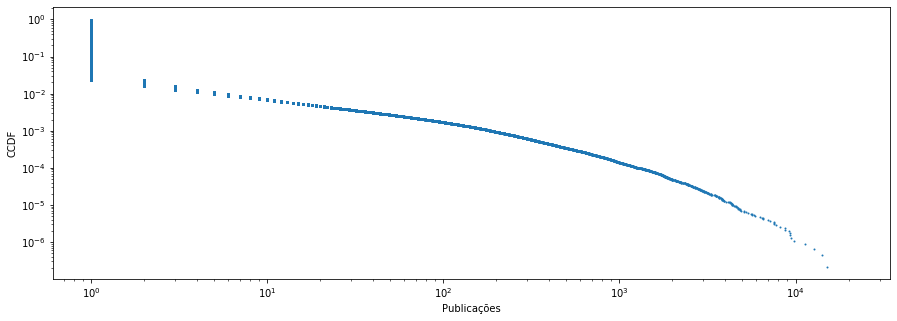

In [4]:
vals = artigos.to_numpy()
ccdf = 1 - vals.cumsum() / vals.sum()
plt.figure(figsize=(15,5))
plt.plot(np.sort(vals),ccdf,'o',markersize=1)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('CCDF')
plt.xlabel('Publicações')
plt.show()

## Estudando a cobertura

Vamos precisar de duas funções:
    
    - Uma para tratar as strings
    - Outra pra dividir uma string com caracteres marcadores

In [5]:
def ops(s):
    s = re.sub(r"\s?\(.*\)", "", s)
    s = unidecode.unidecode(s)
    s = s.lower()
    s = re.sub("\s+", " ", s)
    s = s.strip()
    
    return s

In [6]:
def splt(s):
    chars = [".", ";", ":", "/", "-"]
    subs = [s]
    
    for c in chars:
        aux = list()
        for s in subs:
            aux += s.split(c)
        subs = aux
        
    return subs

Obtendo o conjunto dos periódicos do sjr e a lista dos do lattes

In [7]:
sjr_title = set([ops(x) for string in sjr["Title"].to_list() for x in splt(string)])
lattes_title = [ops(x) for x in artigos.index.to_list()]

Vemos que os três maiores periódicos dos nossos dados aperecem no sjr (considerando string tratadas e nomes quebrados)

In [8]:
difflib.get_close_matches('plos one', sjr_title, cutoff=0.9)

['plos one']

In [9]:
difflib.get_close_matches('revista brasileira de zootecnia', sjr_title, cutoff=0.9)

['revista brasileira de zootecnia']

In [10]:
difflib.get_close_matches('arquivo brasileiro de medicina veterinaria e zootecnia', sjr_title, cutoff=0.9)

['arquivo brasileiro de medicina veterinaria e zootecnia']

Verificando a fração que se encontra no sjr

In [11]:
count = 0
for title in lattes_title:
    strings = splt(title) + [title]
    for s in strings:
        if s in sjr_title:
            count += 1
            break

print(count, count/len(lattes_title))

55279 0.19292435050884368


In [12]:
# count = 0
# for title in lattes_title:
#     strings = splt(title) + [title]
#     for s in strings:
#         if len(difflib.get_close_matches(s , sjr_title, cutoff=0.9)) > 0:
#             count += 1
#             break

# print(count, count/len(lattes_title))